(0, 2.5)

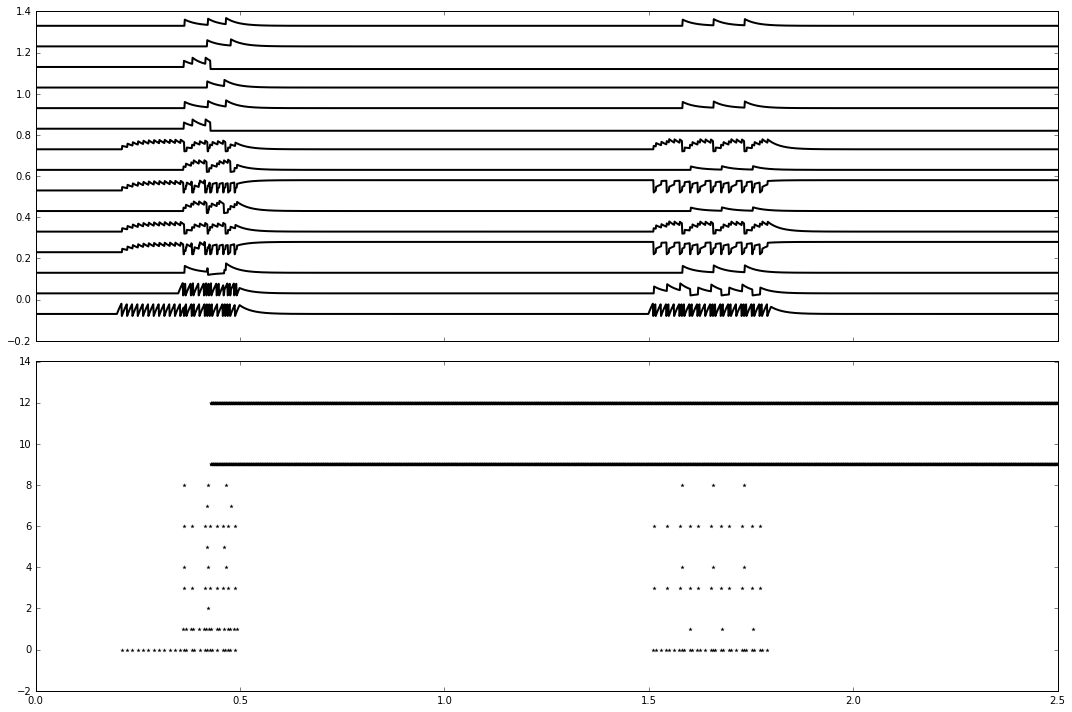

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import pdb
import numpy as np
from network import LIFWithKWTAItems

TAU = 0.03
V_REST = -0.07
V_TH = -0.02
V_RESET = -0.08
T_RP = 0
K_WTA = None
WTA_TH = None
NOISE = 0

W_PA = .5 * np.array(
    [
        [1, 1, 0, 1, 0, 1],
        [1, 0, 1, 1, 1, 0],
        [0, 1, 1, 0, 0, 1],
    ])

W_AP = W_PA.T

W_AM = .05 * np.eye(6)
W_MA = .9 * np.eye(6)
W_MM = 1.8 * np.eye(6)

n_items = W_PA.shape[0]
n_assocs = W_PA.shape[1]
n_mems = W_MM.shape[0]

n_neurons = n_items + n_assocs + n_mems

ntwk = LIFWithKWTAItems(
    tau=TAU, v_rest=V_REST, v_th=V_TH, v_reset=V_RESET, t_rp=T_RP,
    k_wta=K_WTA, wta_th=WTA_TH, noise=NOISE,
    w_pa=W_PA, w_ap=W_AP, w_am=W_AM, w_ma=W_MA, w_mm=W_MM)

# drive

n_steps = 2500

drives = {}
drives['item'] = np.zeros((n_steps, n_items))

drives['item'][200:500, 0] = .16
drives['item'][350:500, 1] = .16

#drives['item'][700:1000, 0] = .1
#drives['item'][850:1000, 2] = .1

drives['item'][1500:1800, 0] = .16

v_init = V_REST * np.ones((n_neurons,))
dt = 0.001

results, ts = ntwk.run(drives, v_init, dt, record=['spikes', 'vs'])

fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True, tight_layout=True)

for ctr, v in enumerate(results['vs'].T):
    
    axs[0].plot(ts, v + .1 * ctr, color='k', lw=2)
    
spike_times, spike_idxs = results['spikes'].nonzero()

axs[1].scatter(spike_times * dt, spike_idxs, marker='*', c='k', lw=0)

axs[1].set_xlim(0, 2500 * dt)